In [4]:
import pandas as pd

In [5]:
df1 = pd.read_csv('fct_invoice.csv')
df2 = pd.read_json('dim_customer.json')

In [6]:
df1.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [117]:
df2.head()

,age,first_name,gender,customer_id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


In [69]:
# Easy question 1: How many unique customers are in the dataset?
df1['customer_id'].nunique()

5191

In [70]:
# Easy question 2: What are the different categories of products available? How many unique categories are there?
df1['category'].nunique()

8

In [8]:
# Easy question 3: Which payment method is the most popular? How many times was it used?
df1['payment_method'].value_counts().head(1)

payment_method
Cash    44447
Name: count, dtype: int64

In [72]:
# Medium question 1: What are the three most popular categories, by total sales?
df1['total_sales'] = df1['quantity'] * df1['price']

df1.groupby(['category'])['total_sales'].sum().sort_values(ascending=False).head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

In [99]:
# Medium question 2: What are the total sales attributed to customers over the age of 45?
df2 = df2.rename(columns={'id': 'customer_id'})

full_df = pd.merge(df1, df2, on='customer_id', how='left')

full_df[full_df['age'] > 45]['total_sales'].sum()

82039768.15

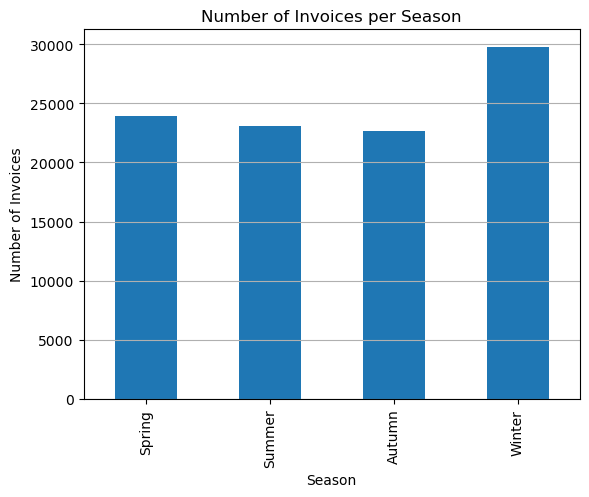

In [101]:
# Medium question 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
import matplotlib.pyplot as plt

def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df1['season'] = df1['invoice_date'].dt.month.apply(season)
seasonal_invoices = df1.groupby('season')['invoice_no'].nunique().reindex(['Spring', 'Summer', 'Autumn', 'Winter'])

seasonal_invoices.plot(kind='bar', title='Number of Invoices per Season')
plt.xlabel('Season')
plt.ylabel('Number of Invoices')
plt.grid(axis='y')
plt.show()

In [102]:
full_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,season,age,first_name,gender,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,Summer,NaN,William,M,Anderson
1,I317333,3433,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,Winter,34.0,Danielle,F,Rivera
2,I127801,644,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,Autumn,46.0,Christopher,M,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,Spring,46.0,Laura,F,Kelly
4,I337046,1089,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,Autumn,NaN,Richard,M,Rhodes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,Autumn,53.0,Michelle,F,Stevens
99453,I325143,172,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,Autumn,NaN,Lauren,F,Perkins
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,Spring,36.0,Mark,M,Pham
99455,I702964,577,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,Spring,64.0,David,M,Williams


In [112]:
# Hard question: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
full_df['age_group'] = pd.cut(
    full_df['age'],
    bins=range(10, 100, 10),
    right=False,
    labels=[f'{i}-{i+9}' for i in range(10, 90, 10)]
)

pivot_table = pd.pivot_table(
    full_df,
    values='total_sales',
    index='category',
    columns='age_group',
    aggfunc='sum',
    observed=False
)

pivot_table

age_group,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
